<a href="https://colab.research.google.com/github/rioseleng/ProyekPertamaMLTerapan/blob/main/Proyek_Pertama_ML_Terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import zipfile
import os

In [32]:
#Retrieve the data from google drive
zip_path = '/content/drive/MyDrive/archive.zip'

#extract the zip file
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/data')
    print("Extraction successful.")
except Exception as e:
    print(f"Error: {e}")

Extraction successful.


In [33]:
import pandas as pd
#Create the dataframe
df = pd.read_csv('/content/data/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


#Data Understanding & Data Preparation

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [35]:
#Check the data shape
df.shape

(13200, 11)

In [36]:
#Identify Missing Value
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [37]:
#Identify duplicate value
df.duplicated().sum()

0

<Axes: xlabel='Temperature'>

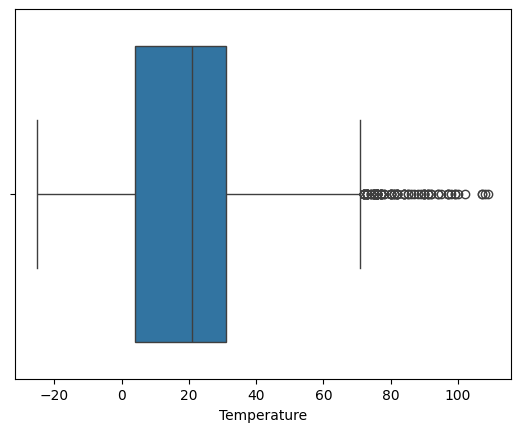

In [38]:
import seaborn as sns
sns.boxplot(x=df['Temperature'])

<Axes: xlabel='Humidity'>

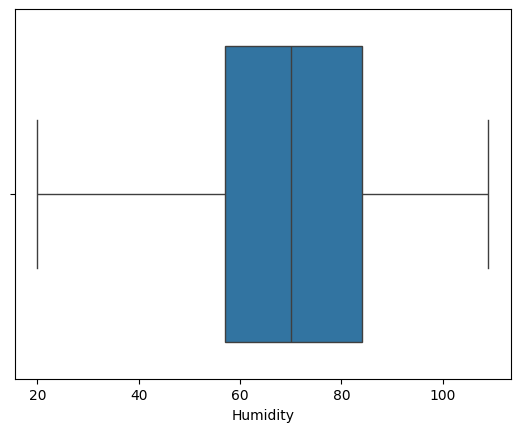

In [39]:
sns.boxplot(x=df['Humidity'])

<Axes: xlabel='Wind Speed'>

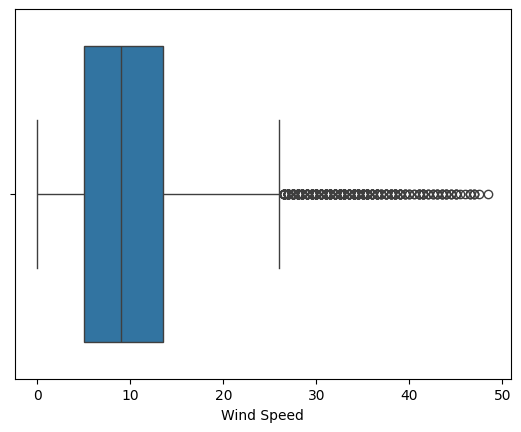

In [40]:
sns.boxplot(x=df['Wind Speed'])

<Axes: xlabel='UV Index'>

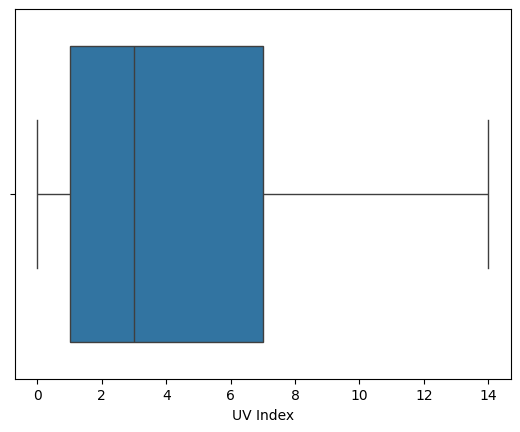

In [41]:
sns.boxplot(x=df['UV Index'])

<Axes: xlabel='Visibility (km)'>

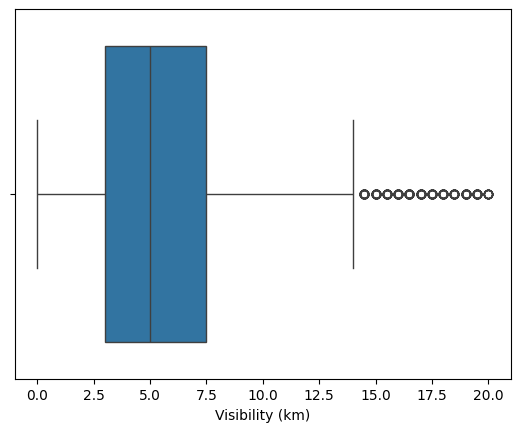

In [42]:
sns.boxplot(x=df['Visibility (km)'])

In [43]:
## Function To return index of outlier data

def outlier_idx_finder(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    ls = df.index[(df[col] < lower) | (df[col] > upper)]
    return ls

outlier_idx = []
num_cols = list(df.select_dtypes(include = ['int', 'float']).columns)

for i in num_cols:

    outlier_idx.extend(outlier_idx_finder(df,i))

outlier_list = set(outlier_idx)

In [48]:
len(outlier_idx)/len(df) * 100

13.681818181818182

The number of outlier data is 13.7% percent of data. It will affect the integrity of the data if I delete it. Therefore, I perform a normalization

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [56]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with outliers handled
# Select numeric columns for normalization
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# Apply StandardScaler to normalize numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [57]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-0.294931,0.212404,-0.048086,0.887629,partly cloudy,0.134203,-0.520104,Winter,-0.582231,inland,Rainy
1,1.143035,1.351385,-0.192836,0.543291,partly cloudy,0.150602,0.776424,Spring,1.345768,inland,Cloudy
2,0.625367,-0.233285,-0.409962,-1.178401,clear,0.346579,0.257813,Spring,0.010999,mountain,Sunny
3,1.085516,0.707613,-1.206089,0.887629,clear,0.549008,0.776424,Spring,-1.323769,coastal,Sunny
4,0.452811,0.261924,1.037543,0.386773,overcast,-0.407490,-0.779410,Winter,-0.878846,mountain,Rainy


Since computer only can recognize numerical value as input. Therefore, I need to encode the columns with object data type

In [60]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [61]:
categorical_cols

Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
Label_encoder = LabelEncoder()

for feature in categorical_cols:
    df[feature] = Label_encoder.fit_transform(df[feature])

In [64]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-0.294931,0.212404,-0.048086,0.887629,3,0.134203,-0.520104,3,-0.582231,1,1
1,1.143035,1.351385,-0.192836,0.543291,3,0.150602,0.776424,1,1.345768,1,0
2,0.625367,-0.233285,-0.409962,-1.178401,0,0.346579,0.257813,1,0.010999,2,3
3,1.085516,0.707613,-1.206089,0.887629,0,0.549008,0.776424,1,-1.323769,0,3
4,0.452811,0.261924,1.037543,0.386773,2,-0.407490,-0.779410,3,-0.878846,2,1


In [76]:
mapping = dict(zip(Label_encoder.classes_, Label_encoder.transform(Label_encoder.classes_)))
print(f'Mapping for {feature}: {mapping}')

Mapping for Weather Type: {'Cloudy': 0, 'Rainy': 1, 'Snowy': 2, 'Sunny': 3}


In [68]:
df['Weather Type'].value_counts()

Weather Type
1    3300
0    3300
3    3300
2    3300
Name: count, dtype: int64

In [66]:
#Separate the independent and dependent variable
X = df.drop('Weather Type', axis=1)
Y = df['Weather Type']

In [67]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Modelling and Evaluation

In [77]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [88]:
#Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = KNN.predict(X_test)
accuracy_knn = accuracy_score(Y_test, y_pred)
print(f"The model accuracy is = {accuracy_knn:}")
print(classification_report(Y_test, y_pred))

The model accuracy is = 0.8981060606060606
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       651
           1       0.86      0.89      0.88       647
           2       0.93      0.94      0.93       701
           3       0.94      0.88      0.91       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [83]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, Y_train)

SVC()

In [87]:
#EVALUATE
y_pred = SVM.predict(X_test)
accuracy_svm = accuracy_score(Y_test, y_pred)
print(f"The model accuracy is = {accuracy_svm:}")
print(classification_report(Y_test, y_pred))

The model accuracy is = 0.9037878787878788
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       651
           1       0.90      0.90      0.90       647
           2       0.95      0.94      0.94       701
           3       0.91      0.88      0.90       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

